In [5]:
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
from pylab import rcParams


In [7]:
%matplotlib inline
sns.set_color_codes()
sns.set_context('poster')
warnings.filterwarnings('ignore')
rcParams['figure.figsize'] = 10, 5

In [24]:
np.random.seed(8)
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[100,])
c = np.random.multivariate_normal([20, 30], [[3, 1], [1, 4]], size=[100,])
#d = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[100,])

X = np.concatenate((a,b,c))
X.shape


(300, 2)

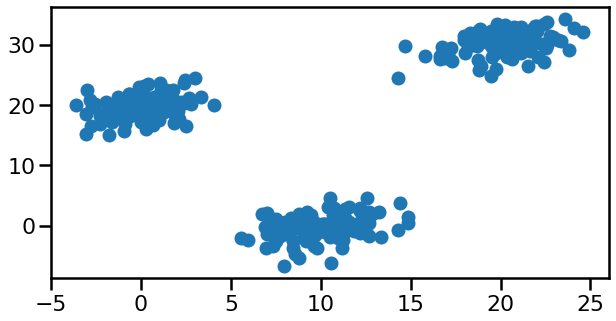

In [26]:
plt.scatter(X[:,0], X[:,1])
plt.show()

[70403.82188589728, 27407.170343876773, 2311.4033586287333, 1976.3978170967682, 1643.8727527341116, 1333.8810741608831, 1166.12005389885, 1036.87136535438, 936.3111259888487]


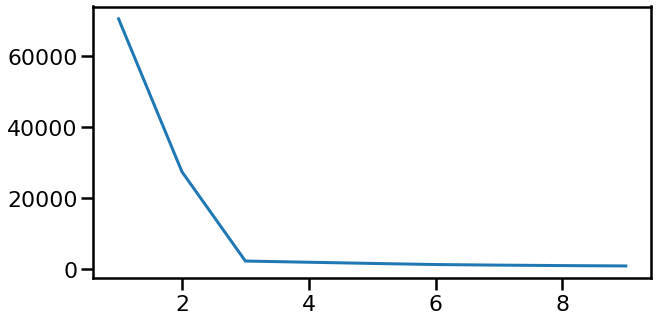

In [30]:
dist_points_from_cluster_center = []
K = range(1,10)
for no_of_clusters in K:
    k_model = KMeans(n_clusters=no_of_clusters)
    k_model.fit(X)
    dist_points_from_cluster_center.append(k_model.inertia_)

print(dist_points_from_cluster_center)

plt.plot(K, dist_points_from_cluster_center)

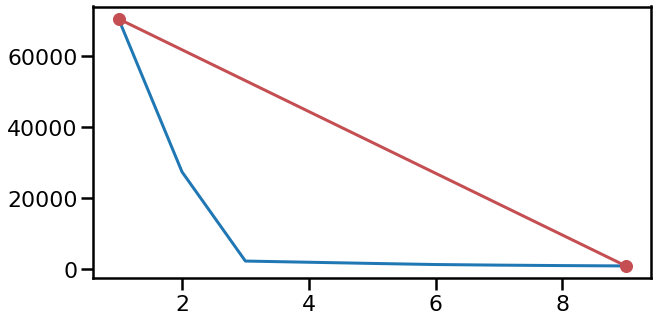

In [34]:
plt.plot(K, dist_points_from_cluster_center)
plt.plot([K[0],K[8]],[dist_points_from_cluster_center[0], dist_points_from_cluster_center[8]], 'ro-')

In [35]:
# func to find distance between a point and line in 2-d
def calc_distance(x1, y1, a, b, c):
    d = abs((a * x1 + b * y1 + c)) / (math.sqrt(a * a + b * b))
    return d

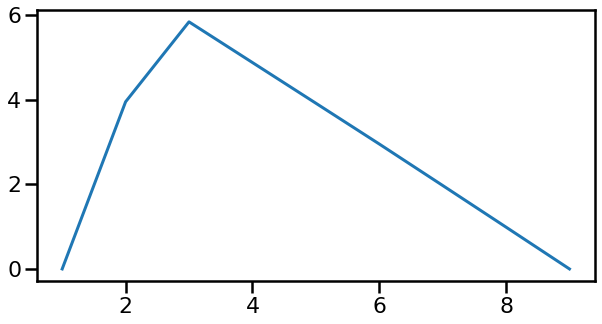

In [48]:
a = dist_points_from_cluster_center[0]-dist_points_from_cluster_center[8]
b = K[8] - K[0]
c1 = K[0] * dist_points_from_cluster_center[8]
c2 = K[8] * dist_points_from_cluster_center[0]
c = c1 - c2

distance_of_points_from_line = []
for k in range(9):
    distance_of_points_from_line.append(calc_distance(K[k], dist_points_from_cluster_center[k], a, b, c))
    
plt.plot(K, distance_of_points_from_line)

In [44]:
print('Optimum value k = ' + str(distance_of_points_from_line.index(max(distance_of_points_from_line))+1))

Optimum value k = 3
